<a href="https://colab.research.google.com/github/davro76/AVANSETools/blob/master/final_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Fly Data

In [ ]:
# import required librairies and dependencies
import pandas as pd
from os import listdir
from os import getcwd
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import glob
pd.set_option('display.max_columns',100)
%matplotlib inline

In [ ]:
# Make Plotly work in our Jupyter Notebook
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# string variable "file_path" which contains the file path to the csv file
file_path = '/content/drive/MyDrive/airline_final'

# using the "pd.read_csv()" method to read the contents of the csv file located at "file_path" and stores it in the DataFrame "df"
airline_final = pd.read_csv(file_path)

# using the "drop()" method to remove the column with the label "Unnamed: 0"
airline_final = airline_final.drop('Unnamed: 0', axis=1)

# Display the first two rows of the df DataFrame
airline_final.head(2)


,mkt_ccode,dep_airport,cancel_code,arr_airport,day_week_name,month__name,route,mkt_fl_no,date,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,delay
0,DL,BNA,0,MSP,Mon,Jan,BNA-MSP,3975,2022-01-24,36,50,36,0,14,0,0,1
1,DL,STL,0,MSP,Sun,Jan,STL-MSP,3714,2022-01-23,32,42,0,0,10,0,32,1


In [ ]:
# Feature selection for building the ML
features_ML = ['mkt_ccode','mkt_fl_no', 'dep_airport','month__name','day_week_name','delay']
df = airline_final[features_ML]
df.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,month__name,day_week_name,delay
0,DL,3975,BNA,Jan,Mon,1
1,DL,3714,STL,Jan,Sun,1


### Split df dataframe between categorical and numerical data

In [ ]:
# Handling categorical features
numer = ['int64']
Cat_feat = df.select_dtypes(exclude=numer) # Categorical features
Cat_feat.head(2)

,mkt_ccode,dep_airport,month__name,day_week_name
0,DL,BNA,Jan,Mon
1,DL,STL,Jan,Sun


In [ ]:
# Numerical features
Num_feat = df.select_dtypes(include=numer)
Num_feat.head(1)

,mkt_fl_no,delay
0,3975,1


### Encoding dep_airport feature

In [ ]:
# List of different departure airport codes
airport_codes = ['BNA', 'STL', 'IAD', 'ALB', 'MSP', 'DTW', 'SCE', 'SYR', 'ORD',
       'IND', 'LGA', 'XNA', 'JFK', 'MKE', 'ORF', 'ATL', 'HPN', 'ICT',
       'VPS', 'CVG', 'BOS', 'EWR', 'TLH', 'TYS', 'MLI', 'MEM', 'BGR',
       'CHO', 'BTV', 'ABE', 'BTR', 'BQK', 'RDU', 'SHV', 'CHS', 'MYR',
       'AUS', 'ILM', 'LFT', 'SBN', 'FSD', 'LEX', 'DSM', 'DAY', 'GRB',
       'CRW', 'SAV', 'BIS', 'BUF', 'CLT', 'GRR', 'JAN', 'CMH', 'TRI',
       'ROC', 'OAJ', 'ECP', 'MOB', 'CID', 'MIA', 'RIC', 'MSN', 'DLH',
       'EVV', 'AGS', 'PWM', 'MDW', 'PIT', 'DCA', 'ATW', 'LAN', 'CHA',
       'HSV', 'CLE', 'GSO', 'PVD', 'GFK', 'GPT', 'PHL', 'GSP', 'AZO',
       'ABY', 'DHN', 'MBS', 'MOT', 'SGF', 'CAE', 'VLD', 'MDT', 'EYW',
       'GNV', 'AEX', 'SDF', 'MLU', 'TVC', 'BHM', 'RST', 'GTR', 'BWI',
       'MGM', 'CWA', 'CSG', 'AVL', 'BMI', 'FWA', 'ROA', 'FAY', 'ITH',
       'TUL', 'BGM', 'FAR', 'ORH', 'DFW', 'LAX', 'OGG', 'HNL', 'SFO',
       'KOA', 'SJU', 'LIH', 'STT', 'PHX', 'SAN', 'AMA', 'IAH', 'BDL',
       'MCO', 'SNA', 'JAX', 'DEN', 'ELP', 'ABQ', 'MSY', 'FLL', 'RSW',
       'PBI', 'LAS', 'EUG', 'TPA', 'GEG', 'ONT', 'SEA', 'SMF', 'FAT',
       'SRQ', 'JAC', 'SAT', 'MCI', 'SLC', 'SBA', 'RNO', 'PSP', 'PNS',
       'TUS', 'BZN', 'MFE', 'SJC', 'EGE', 'MSO', 'MTJ', 'PDX', 'STX',
       'OKC', 'COS', 'OMA', 'GUC', 'HDN', 'AVP', 'BUR', 'ADQ', 'ANC',
       'BET', 'BRW', 'JNU', 'KTN', 'SIT', 'DAL', 'FAI', 'OTZ', 'ADK',
       'OAK', 'BOI', 'YAK', 'CDV', 'WRG', 'PSG', 'OME', 'SCC', 'BQN',
       'PSE', 'LRD', 'LCH', 'DIK', 'CRP', 'LIT', 'LNK', 'HRL', 'LBB',
       'CPR', 'SAF', 'BRO', 'IDA', 'DRO', 'FLG', 'MAF', 'HLN', 'COD',
       'GJT', 'CLL', 'DAB', 'BIL', 'FCA', 'MLB', 'HOU', 'LGB', 'TTN',
       'ISP', 'SWF', 'ILG', 'SFB', 'FNT', 'USA', 'PGD', 'PIE', 'IAG',
       'PIA', 'AZA', 'STC', 'PSM', 'MFR', 'SCK', 'SMX', 'TOL', 'PBG',
       'GRI', 'RAP', 'BLV', 'RFD', 'HGR', 'ELM', 'PVU', 'SPI', 'PSC',
       'LCK', 'BLI', 'GTF', 'MRY', 'OGD', 'OWB', 'HTS', 'CKB', 'RDM',
       'HHH', 'PQI', 'MHT', 'ITO', 'PPG', 'GCK', 'GGG', 'SPS', 'CMI',
       'ALO', 'FSM', 'LSE', 'LAW', 'ABI', 'TYR', 'GRK', 'DBQ', 'SJT',
       'MHK', 'MQT', 'SWO', 'TXK', 'ACT', 'COU', 'SBP', 'BPT', 'DRT',
       'ROW', 'ACY', 'LBE', 'CAK', 'PHF', 'LYH', 'ERI', 'EWN', 'ASE',
       'YUM', 'BFL', 'ACV', 'SGU', 'SUN', 'LWS', 'ESC', 'INL', 'ABR',
       'APN', 'CIU', 'TWF', 'HIB', 'XWA', 'RHI', 'IMT', 'BTM', 'PLN',
       'BJI', 'BRD', 'CDC', 'EKO', 'PIH', 'OGS', 'DVL', 'JMS', 'MCW',
       'SHD', 'PUB', 'LBL', 'PIB', 'SHR', 'PAH', 'VEL', 'PIR', 'PRC',
       'DDC', 'FOD', 'CGI', 'HYS', 'RKS', 'CNY', 'ATY', 'SLN', 'DEC',
       'CYS', 'ALS', 'VCT', 'RIW', 'SUX', 'MEI', 'GCC', 'JST', 'TBN',
       'EAR', 'RDD', 'BIH', 'STS', 'OTH', 'HOB', 'LWB', 'BFF', 'LBF',
       'CMX', 'JLN', 'EAU', 'MKG', 'LAR', 'PGV', 'ART', 'SBY', 'FLO',
       'YKM', 'ALW', 'PUW', 'PAE', 'EAT', 'DLG', 'AKN', 'GUM', 'SPN',
       'ACK', 'GST', 'HYA', 'MVY', 'BKG', 'WYS']  

# Create a dictionary called airport_mapping
airport_mapping = {code: i + 1 for i, code in enumerate(airport_codes)}

# Map the departure airport codes
Cat_feat['airport'] = Cat_feat['dep_airport'].map(airport_mapping)

# Get the unique index numbers 
Cat_feat['airport'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
# List of different departure airport codes
airport_codes_list = ['BNA', 'STL', 'IAD', 'ALB', 'MSP', 'DTW', 'SCE', 'SYR', 'ORD',
       'IND', 'LGA', 'XNA', 'JFK', 'MKE', 'ORF', 'ATL', 'HPN', 'ICT',
       'VPS', 'CVG', 'BOS', 'EWR', 'TLH', 'TYS', 'MLI', 'MEM', 'BGR',
       'CHO', 'BTV', 'ABE', 'BTR', 'BQK', 'RDU', 'SHV', 'CHS', 'MYR',
       'AUS', 'ILM', 'LFT', 'SBN', 'FSD', 'LEX', 'DSM', 'DAY', 'GRB',
       'CRW', 'SAV', 'BIS', 'BUF', 'CLT', 'GRR', 'JAN', 'CMH', 'TRI',
       'ROC', 'OAJ', 'ECP', 'MOB', 'CID', 'MIA', 'RIC', 'MSN', 'DLH',
       'EVV', 'AGS', 'PWM', 'MDW', 'PIT', 'DCA', 'ATW', 'LAN', 'CHA',
       'HSV', 'CLE', 'GSO', 'PVD', 'GFK', 'GPT', 'PHL', 'GSP', 'AZO',
       'ABY', 'DHN', 'MBS', 'MOT', 'SGF', 'CAE', 'VLD', 'MDT', 'EYW',
       'GNV', 'AEX', 'SDF', 'MLU', 'TVC', 'BHM', 'RST', 'GTR', 'BWI',
       'MGM', 'CWA', 'CSG', 'AVL', 'BMI', 'FWA', 'ROA', 'FAY', 'ITH',
       'TUL', 'BGM', 'FAR', 'ORH', 'DFW', 'LAX', 'OGG', 'HNL', 'SFO',
       'KOA', 'SJU', 'LIH', 'STT', 'PHX', 'SAN', 'AMA', 'IAH', 'BDL',
       'MCO', 'SNA', 'JAX', 'DEN', 'ELP', 'ABQ', 'MSY', 'FLL', 'RSW',
       'PBI', 'LAS', 'EUG', 'TPA', 'GEG', 'ONT', 'SEA', 'SMF', 'FAT',
       'SRQ', 'JAC', 'SAT', 'MCI', 'SLC', 'SBA', 'RNO', 'PSP', 'PNS',
       'TUS', 'BZN', 'MFE', 'SJC', 'EGE', 'MSO', 'MTJ', 'PDX', 'STX',
       'OKC', 'COS', 'OMA', 'GUC', 'HDN', 'AVP', 'BUR', 'ADQ', 'ANC',
       'BET', 'BRW', 'JNU', 'KTN', 'SIT', 'DAL', 'FAI', 'OTZ', 'ADK',
       'OAK', 'BOI', 'YAK', 'CDV', 'WRG', 'PSG', 'OME', 'SCC', 'BQN',
       'PSE', 'LRD', 'LCH', 'DIK', 'CRP', 'LIT', 'LNK', 'HRL', 'LBB',
       'CPR', 'SAF', 'BRO', 'IDA', 'DRO', 'FLG', 'MAF', 'HLN', 'COD',
       'GJT', 'CLL', 'DAB', 'BIL', 'FCA', 'MLB', 'HOU', 'LGB', 'TTN',
       'ISP', 'SWF', 'ILG', 'SFB', 'FNT', 'USA', 'PGD', 'PIE', 'IAG',
       'PIA', 'AZA', 'STC', 'PSM', 'MFR', 'SCK', 'SMX', 'TOL', 'PBG',
       'GRI', 'RAP', 'BLV', 'RFD', 'HGR', 'ELM', 'PVU', 'SPI', 'PSC',
       'LCK', 'BLI', 'GTF', 'MRY', 'OGD', 'OWB', 'HTS', 'CKB', 'RDM',
       'HHH', 'PQI', 'MHT', 'ITO', 'PPG', 'GCK', 'GGG', 'SPS', 'CMI',
       'ALO', 'FSM', 'LSE', 'LAW', 'ABI', 'TYR', 'GRK', 'DBQ', 'SJT',
       'MHK', 'MQT', 'SWO', 'TXK', 'ACT', 'COU', 'SBP', 'BPT', 'DRT',
       'ROW', 'ACY', 'LBE', 'CAK', 'PHF', 'LYH', 'ERI', 'EWN', 'ASE',
       'YUM', 'BFL', 'ACV', 'SGU', 'SUN', 'LWS', 'ESC', 'INL', 'ABR',
       'APN', 'CIU', 'TWF', 'HIB', 'XWA', 'RHI', 'IMT', 'BTM', 'PLN',
       'BJI', 'BRD', 'CDC', 'EKO', 'PIH', 'OGS', 'DVL', 'JMS', 'MCW',
       'SHD', 'PUB', 'LBL', 'PIB', 'SHR', 'PAH', 'VEL', 'PIR', 'PRC',
       'DDC', 'FOD', 'CGI', 'HYS', 'RKS', 'CNY', 'ATY', 'SLN', 'DEC',
       'CYS', 'ALS', 'VCT', 'RIW', 'SUX', 'MEI', 'GCC', 'JST', 'TBN',
       'EAR', 'RDD', 'BIH', 'STS', 'OTH', 'HOB', 'LWB', 'BFF', 'LBF',
       'CMX', 'JLN', 'EAU', 'MKG', 'LAR', 'PGV', 'ART', 'SBY', 'FLO',
       'YKM', 'ALW', 'PUW', 'PAE', 'EAT', 'DLG', 'AKN', 'GUM', 'SPN',
       'ACK', 'GST', 'HYA', 'MVY', 'BKG', 'WYS'
    
]

# Creating a dictionary called airport_codes_dict where the keys are airport codes and the values are their corresponding unique index numbers
airport_codes_dict = {code: index + 1 for index, code in enumerate(airport_codes_list)}


# Printing the airport_codes_dict
print(airport_codes_dict)

{'BNA': 1, 'STL': 2, 'IAD': 3, 'ALB': 4, 'MSP': 5, 'DTW': 6, 'SCE': 7, 'SYR': 8, 'ORD': 9, 'IND': 10, 'LGA': 11, 'XNA': 12, 'JFK': 13, 'MKE': 14, 'ORF': 15, 'ATL': 16, 'HPN': 17, 'ICT': 18, 'VPS': 19, 'CVG': 20, 'BOS': 21, 'EWR': 22, 'TLH': 23, 'TYS': 24, 'MLI': 25, 'MEM': 26, 'BGR': 27, 'CHO': 28, 'BTV': 29, 'ABE': 30, 'BTR': 31, 'BQK': 32, 'RDU': 33, 'SHV': 34, 'CHS': 35, 'MYR': 36, 'AUS': 37, 'ILM': 38, 'LFT': 39, 'SBN': 40, 'FSD': 41, 'LEX': 42, 'DSM': 43, 'DAY': 44, 'GRB': 45, 'CRW': 46, 'SAV': 47, 'BIS': 48, 'BUF': 49, 'CLT': 50, 'GRR': 51, 'JAN': 52, 'CMH': 53, 'TRI': 54, 'ROC': 55, 'OAJ': 56, 'ECP': 57, 'MOB': 58, 'CID': 59, 'MIA': 60, 'RIC': 61, 'MSN': 62, 'DLH': 63, 'EVV': 64, 'AGS': 65, 'PWM': 66, 'MDW': 67, 'PIT': 68, 'DCA': 69, 'ATW': 70, 'LAN': 71, 'CHA': 72, 'HSV': 73, 'CLE': 74, 'GSO': 75, 'PVD': 76, 'GFK': 77, 'GPT': 78, 'PHL': 79, 'GSP': 80, 'AZO': 81, 'ABY': 82, 'DHN': 83, 'MBS': 84, 'MOT': 85, 'SGF': 86, 'CAE': 87, 'VLD': 88, 'MDT': 89, 'EYW': 90, 'GNV': 91, 'AEX': 

### Process mkt_ccode feature

In [ ]:
# Display the unique values for mkt_code
Cat_feat['mkt_ccode'].unique()

array(['DL', 'AA', 'AS', 'B6', 'UA', 'F9', 'G4', 'HA', 'NK', 'WN'],
      dtype=object)

In [ ]:
# Using map methode to change abbreviated airline name to numeric airline identification  
airline_mapping = {'DL':1, 'AA':2, 'AS':3, 'B6':4, 'UA':5, 'F9':6, 'G4':7, 'HA':8, 'NK':9, 'WN':10}

# Creating a new column in the Cat_feat DataFrame called 'airline', and populates it with values based on the 'mkt_ccode' column. 
Cat_feat['airline'] = Cat_feat['mkt_ccode'].map(airline_mapping)

# returning an array of the unique values in the 'month' column.
Cat_feat['airline'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Process month__name feature

In [ ]:
# Using map methode to change abbreviated month name to numeric month  
month_mapping = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,'Oct':10}

# Creating a new column in the Cat_feat DataFrame called 'month', and populates it with values based on the 'month__name' column. 
Cat_feat['month'] = Cat_feat['month__name'].map(month_mapping)

# returning an array of the unique values in the 'month' column.
Cat_feat['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Process day_week_name feature

In [ ]:
# Handling categorical data

# Using map methode to change abbreviated day name to numeric day  
day_mapping = {'Mon':1,'Sun':7, 'Fri':5, 'Tue':2, 'Wed':3, 'Sat':6, 'Thu':4}

# Creating a new column in the Cat_feat DataFrame called 'day', and populates it with values based on the 'day_week_name' column. 
Cat_feat['day'] = Cat_feat['day_week_name'].map(day_mapping)

# returning an array of the unique values in the 'day' column.
Cat_feat['day'].unique()

array([1, 7, 5, 2, 3, 6, 4])

In [ ]:
# Concatenat Cat_feat and Num_feat
df_final = pd.concat([Cat_feat,Num_feat], axis=1)
print(df_final.shape)

# Drop categorical columns 
cat_col = ['mkt_ccode','dep_airport','month__name','day_week_name']
df_final = df_final.drop(cat_col,axis=1)
df_final.head(1)

(5867108, 10)


,airport,airline,month,day,mkt_fl_no,delay
0,1,1,1.0,1,3975,1


In [ ]:
# Using a copy of te dataset to build the ML Model
model_df = df_final.copy()

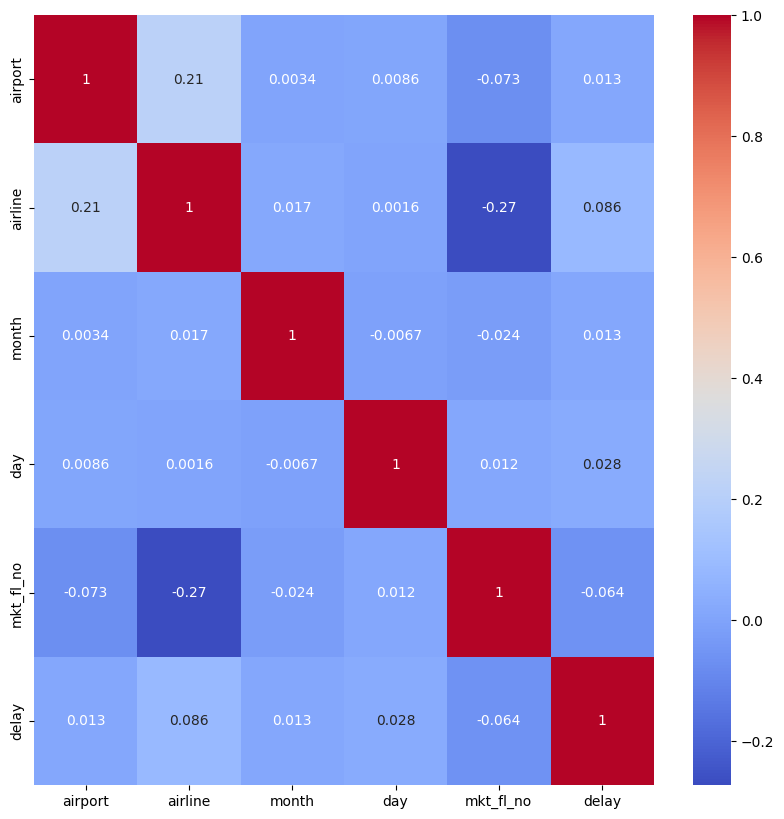

In [ ]:
# Feature importance using the correlation technique
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(model_df.corr(), annot=True, cmap='coolwarm');

In [ ]:
# Matrice of correlation
model_df.corr()

,airport,airline,month,day,mkt_fl_no,delay
airport,1.000000,0.214844,0.003362,0.008600,-0.072911,0.013331
airline,0.214844,1.000000,0.016826,0.001632,-0.273460,0.085900
month,0.003362,0.016826,1.000000,-0.006679,-0.023642,0.013271
day,0.008600,0.001632,-0.006679,1.000000,0.012460,0.028054
mkt_fl_no,-0.072911,-0.273460,-0.023642,0.012460,1.000000,-0.063502
delay,0.013331,0.085900,0.013271,0.028054,-0.063502,1.000000


# Create The Classification Neural Network Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Dataframe
df_CNN = model_df.copy()

# Preprocessing
X = df_CNN.drop('delay', axis=1).values
y = df_CNN['delay'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/50
146678/146678 [==============================] - 235s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 2/50
146678/146678 [==============================] - 225s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 3/50
146678/146678 [==============================] - 225s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 4/50
146678/146678 [==============================] - 225s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 5/50
146678/146678 [==============================] - 222s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 6/50
146678/146678 [==============================] - 229s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 7/50
146678/146678 [==============================] - 221s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 8/50
146678/146678 [==============================] - 226s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 9/50
146678/146678 [==============================] - 228s 2ms/step - loss: nan - accuracy: 0.6425
Epoch 10/50
146678/146678 [============================